In [1]:
import xinfer

/home/dnth/Desktop/vlm-parser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-01 20:15:46,597	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
model = xinfer.create_model("microsoft/Florence-2-large", device="cuda", dtype="float16")

2025-01-01 20:15:47.551 | INFO     | xinfer.models:__init__:63 - Model: microsoft/Florence-2-large
2025-01-01 20:15:47.551 | INFO     | xinfer.models:__init__:64 - Device: cuda
2025-01-01 20:15:47.552 | INFO     | xinfer.models:__init__:65 - Dtype: float16
/home/dnth/Desktop/vlm-parser/.venv/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [14]:
image_path = "/home/dnth/Downloads/sample_images/coco/000000000785.jpg"
results = model.infer(image_path, text="<CAPTION_TO_PHRASE_GROUNDING>person. ski. sticks.").text
results

'person<loc_436><loc_99><loc_780><loc_920>ski<loc_323><loc_843><loc_962><loc_944><loc_409><loc_898><loc_962><loc_942><loc_324><loc_845><loc_799><loc_900>sticks<loc_676><loc_374><loc_946><loc_894><loc_438><loc_399><loc_528><loc_743>'

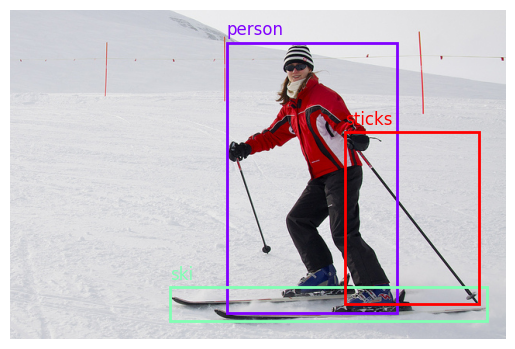

In [15]:
import numpy as np
def plot_detections(image_path, output_string):
    """
    Plot bounding boxes and labels from xinfer output string
    
    Args:
        image_path (str): Path to the image
        output_string (str): Output string in format "class<loc_x1><loc_y1><loc_x2><loc_y2>"
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import re
    
    # Read the image
    img = plt.imread(image_path)
    height, width = img.shape[:2]
    
    # Create figure and axes
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    # Regular expression to extract class names and coordinates
    pattern = r'(\w+)<loc_(\d+)><loc_(\d+)><loc_(\d+)><loc_(\d+)>'
    matches = re.finditer(pattern, output_string)
    
    # Generate random colors for each class
    import random
    colors = plt.cm.rainbow(np.linspace(0, 1, len(re.findall(pattern, output_string))))
    
    # Plot each detection
    for idx, match in enumerate(matches):
        class_name = match.group(1)
        x1 = int(int(match.group(2)) / 1000 * width)
        y1 = int(int(match.group(3)) / 1000 * height)
        x2 = int(int(match.group(4)) / 1000 * width)
        y2 = int(int(match.group(5)) / 1000 * height)
        
        # Create rectangle
        rect = patches.Rectangle(
            (x1, y1),
            x2 - x1,
            y2 - y1,
            linewidth=2,
            edgecolor=colors[idx],
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add label
        plt.text(x1, y1-10, class_name, color=colors[idx], fontsize=12)
    
    plt.axis('off')
    plt.show()

plot_detections(image_path, results)